# Data Analysis - Zubiri

In this notebook, the data resulting from the experiment with the AR Geography App in the *Zubiri Manteo* school will be analysed. The data includes both the raw data compiled from the app and the student surveys. There are two types of students based on the device they use during the experiment: PC (they can see what other students do and provide suggestions) or mobile (they can also receive questions from the teacher and answer them). After the trial, the students were given a survey consisting of a number of questions, which they had to rate from 1 to 5. There were 16 common questions, 2 questions phrased slightly differently for mobile/PC users, and 2 questions only for mobile users. 9 of the students used a mobile device, and another 9 students used a PC.

The analysis performed here is structured the same way as the analysis data in the [notebook](./Data_Analysis_Salesianos.ipynb) with the analysis of the data from the *Salesianos* school, and the [notebook](./Data_Analysis_Deusto.ipynb) with the analysis of the data from the *Deusto* school

## Student Surveys

In this section we will analyse the student surveys that were completed after the experiment. This part of the analysis will focus on the common questions first, and later on the questions answered only by students using a mobile device. The 2 questions phrased differently are #18 and #20:

* Being able to use augmented reality / 3D elements makes the application more entertaining
* Thanks to augmented reality / 3D elements I have felt immersed in the learning activity

Where the words "augmented reality" were used in the questionnaires filled by the students using a mobile device, and "3D elements" in case of students on PC.

In [1]:
# If you want to use help from chatGPT, uncomment the following line
%load_ext ask_ai.magics
# make sure that you have stored your OpenAI API key in the variable OPENAI_API_KEY

In [2]:
# And import the necessary libraries. xapi_analysis is the package we created to help analysing xapi statements
from xapi_analysis.input_csv import *
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

# Let's also set some useful display constants for pandas
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
pd.options.display.max_colwidth = 500

# And something for plotting better images, too.
plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['axes.titlesize'] = 18     # fontsize of the axes title
plt.rcParams['axes.labelsize'] = 14    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 13    # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 13    # fontsize of the tick labels
plt.rcParams['legend.fontsize'] = 13    # legend fontsize
plt.rcParams['font.size'] = 13
cmap = sns.color_palette('icefire', as_cmap=True)

In [3]:
SURVEY_FILE = Path('./questionnaire_answers.xlsx')
SHEET_NAME = 'ZUBIRI_MANTEO'
NUM_ROWS = 22
COLS = list(range(21))
COLS.pop(1) # remove second index from excel

survey_answers = pd.read_excel(SURVEY_FILE, sheet_name=SHEET_NAME, index_col=0, nrows=NUM_ROWS, 
                               usecols=COLS)

In [4]:
survey_answers.head(3)

,QUESTIONS,Type,iPad202,Tablet201,Tablet202,iPhone201,iPhone202,Android201,Android202,Android203,Android204,PC021,PC022,PC023,PC024,PC025,PC026,PC028,PC029
Q-M,,,,,,,,,,,,,,,,,,,
1,I think that I would like to use the application frequently.,Collaboration,3,3,4,4,3,5,1,4,4,5.0,3.0,1.0,4.0,3.0,5.0,4.0,5.0
2,I found the application to be simple.,Usability,5,4,5,5,5,5,4,4,5,4.0,3.0,5.0,5.0,2.0,3.0,5.0,4.0
3,I thought the application was easy to use.,Usability,5,4,5,5,5,5,4,4,5,5.0,2.0,5.0,5.0,5.0,5.0,5.0,4.0


Let's check which questions have achieved the greates score

In [5]:
survey_answers['mean'] = survey_answers.mean(numeric_only=True, axis=1)
questions_avg = survey_answers[["QUESTIONS", "mean"]]
questions_avg = questions_avg.sort_values("mean")
questions_avg

,QUESTIONS,mean
Q-M,,
12,Receiving suggestions made me more confident when answering a question,3.444444
15,Suggestions from my classmates have helped me when answering the exercise,3.555556
1,I think that I would like to use the application frequently.,3.588235
10,I would like to use the application during a test,3.882353
11,Being able to provide suggestions made me feel more involved,3.941176
5,I found the various functions in the application were well integrated,4.058824
17,I would like to use the application to learn new concepts,4.058824
20,Thanks to augmented reality / 3D elements I have felt immersed in the learning activity,4.117647
6,I would imagine that most people would learn to use the application very quickly.,4.176471


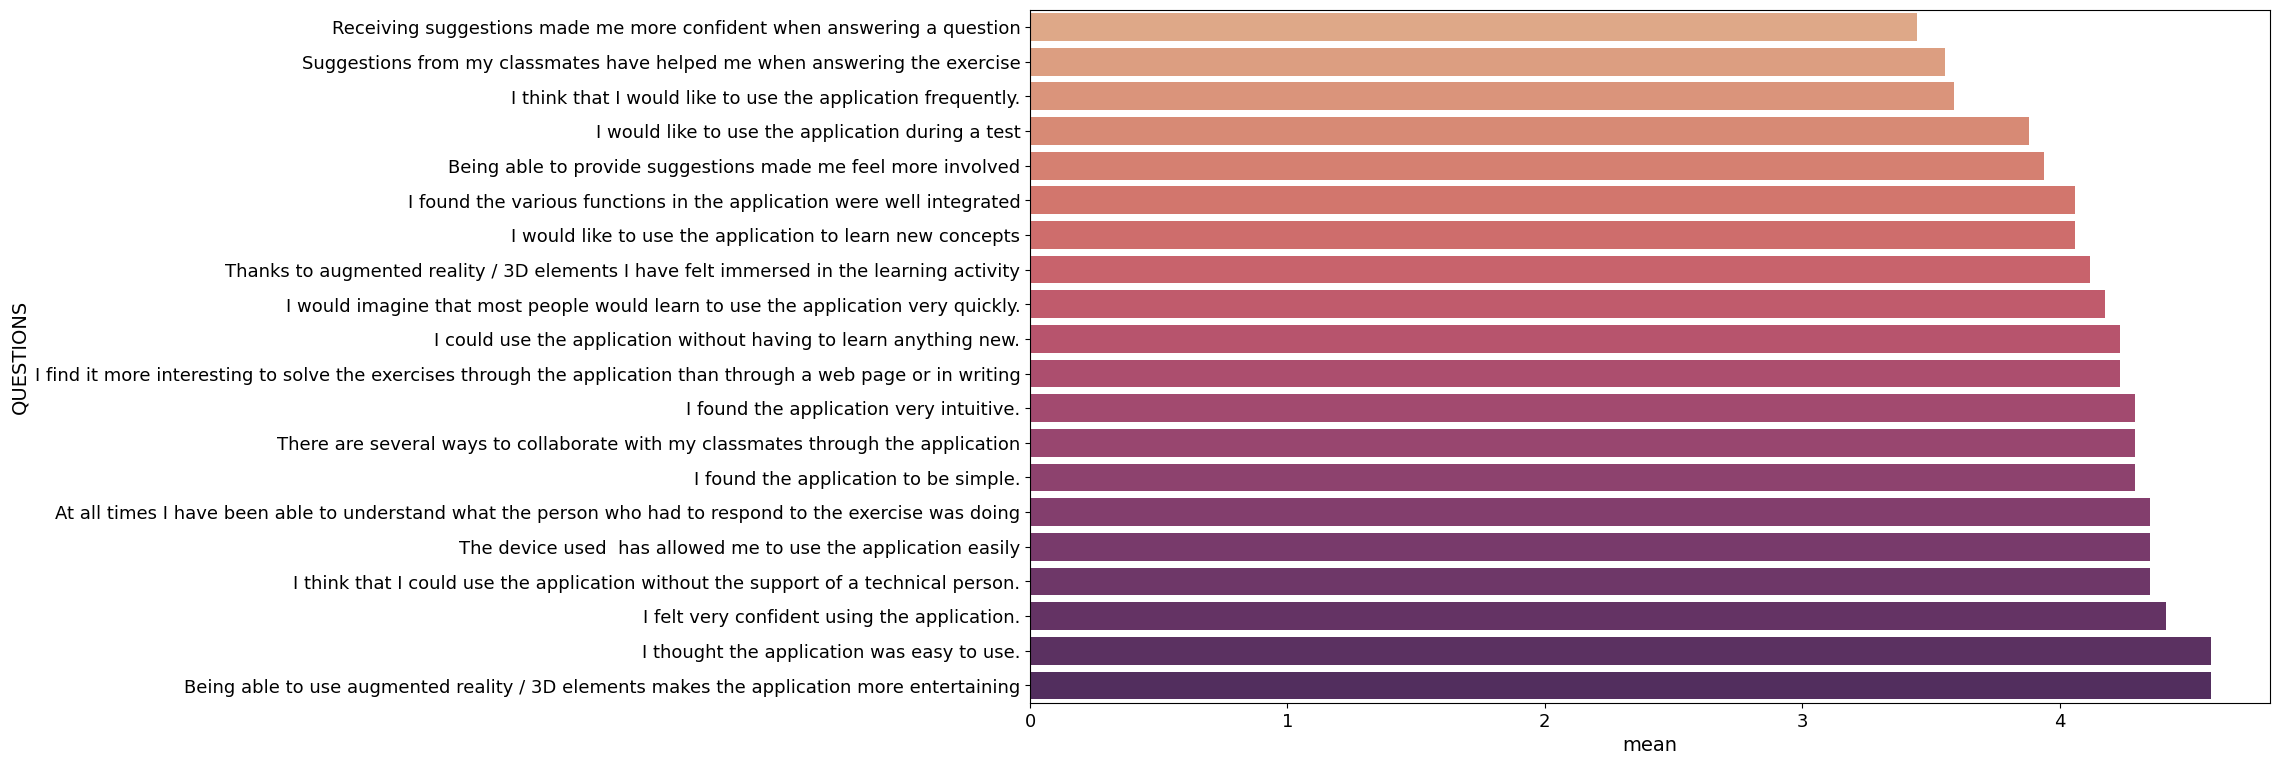

In [6]:
create_barplot(questions_avg, 'mean', 'QUESTIONS')

Let's check better the questions who received the top and bottom scores

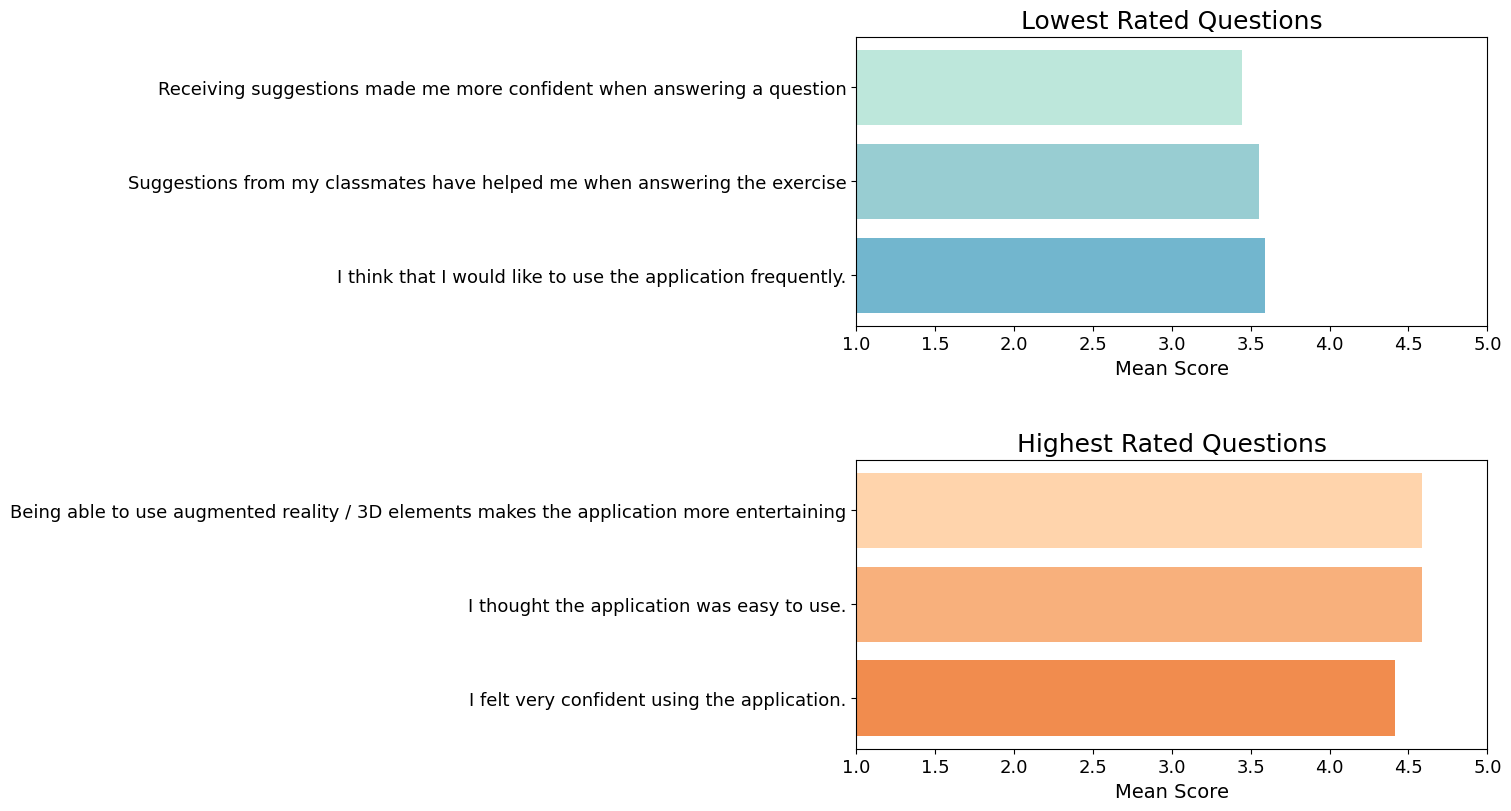

In [7]:
f, axs = plt.subplots(2,1)

colors = [cmap(i) for i in np.linspace(0, 1, len(questions_avg))]

axs[0].barh(questions_avg['QUESTIONS'].iloc[:3], questions_avg['mean'].iloc[:3], color=colors[:3], align='center')
axs[0].set_title('Lowest Rated Questions')
axs[0].set_xlabel('Mean Score')
axs[0].set_xlim(1,5)
axs[0].invert_yaxis()

axs[1].barh(questions_avg['QUESTIONS'].iloc[-3:], questions_avg['mean'].iloc[-3:], color=colors[-3:], align='center')
axs[1].set_title('Highest Rated Questions')
axs[1].set_xlabel('Mean Score')
axs[1].set_xlim(1,5)

f.tight_layout(pad=3.0)

plt.show()

Now let's analyse the same data from the perspective of the students.

In [8]:
students_avg = survey_answers.drop(["QUESTIONS", "Type"], axis=1)
student_list = students_avg.mean().sort_values()
student_list = pd.DataFrame(student_list).reset_index()
student_list.columns = ["Student", "mean"]
student_list

,Student,mean
0,Android202,2.750000
1,Tablet201,3.350000
2,PC025,3.611111
3,Tablet202,3.700000
4,PC029,3.722222
5,PC022,3.944444
6,mean,4.141176
7,iPhone202,4.300000
8,PC026,4.333333
9,iPad202,4.400000


(1.0, 5.0)

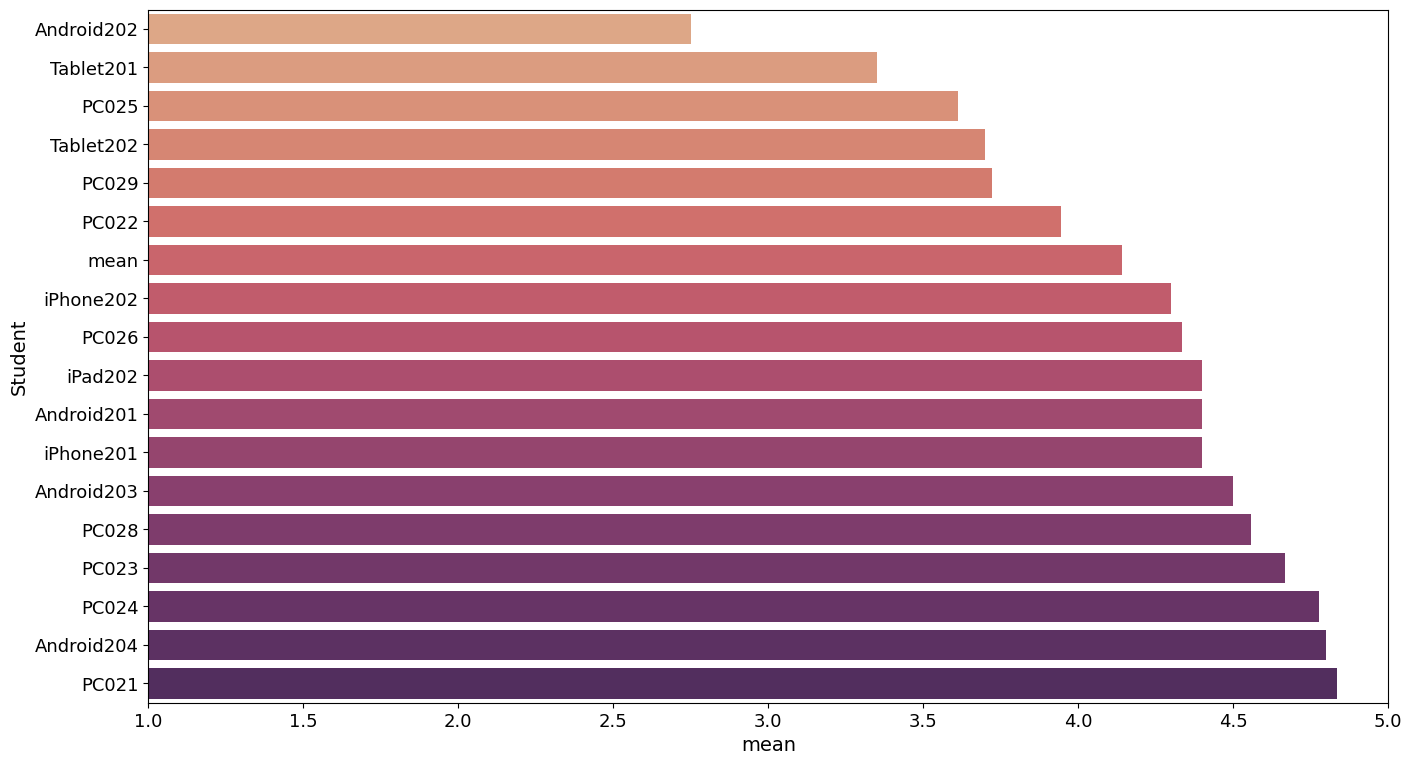

In [9]:
create_barplot(student_list, 'mean', 'Student')
plt.xlim(1,5)

Compared to the analysis of the data of the students from the previous schools, the average score is a bit higher. The user *Android202* looks like an outlier, as his average punctuation is quite a bit lower than the mean.

In [10]:
mobile_list = student_list[student_list["Student"].str.startswith(("Android", "iPhone", "iPad", "Tablet"))]
pc_list = student_list[student_list["Student"].str.startswith(("PC"))]
mobile_list_mean = mobile_list["mean"].mean()
pc_list_mean = pc_list["mean"].mean()
print(f"Mobile-only average score: {mobile_list_mean}")
print(f"PC-only average score: {pc_list_mean}")

Mobile-only average score: 4.066666666666666
PC-only average score: 4.305555555555555


In this test, the average punctuation from students using a PC is about a quarter of a point higher than that for students using a mobile device.

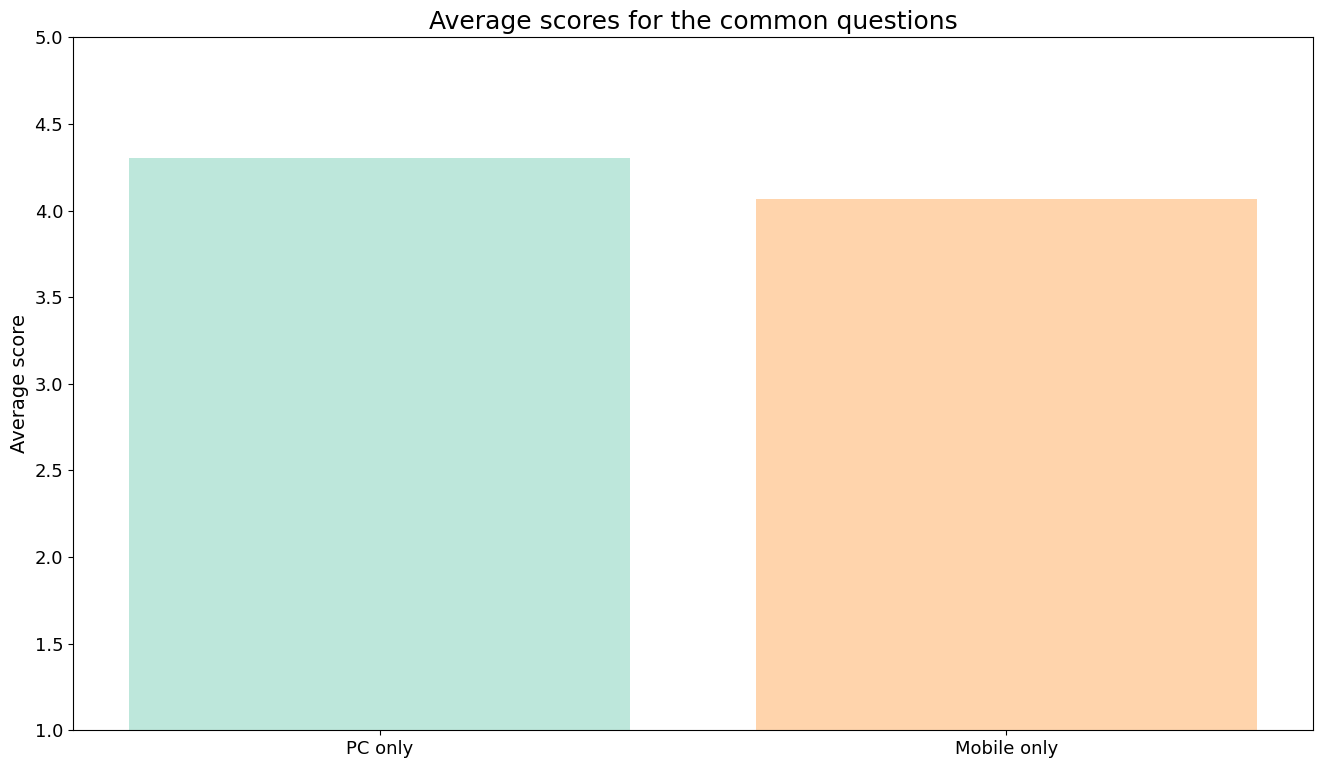

In [11]:
names = ["PC only", "Mobile only"]
values = [pc_list_mean, mobile_list_mean]
colors = [cmap(i) for i in np.linspace(0, 1, len(values))]

plt.bar(names, values, color=colors)
plt.title("Average scores for the common questions")
plt.ylabel("Average score")
plt.ylim(1,5)
plt.show()

Let's analyze the answers, but grouped by question type, now. There are 4 questions types:

* Collaboration: Collaborative aspects of the app
* Functionality: App Functionalities
* Usability: App Usability
* Education: Interest as educational tool

In [12]:
students_q_type = survey_answers[["Type", "mean"]]
students_q_type = students_q_type.groupby("Type", as_index=False)["mean"].mean().sort_values("mean")
students_q_type

,Type,mean
0,Collaboration,3.862745
2,Functionality,4.058824
1,Education,4.176471
3,Usability,4.338235


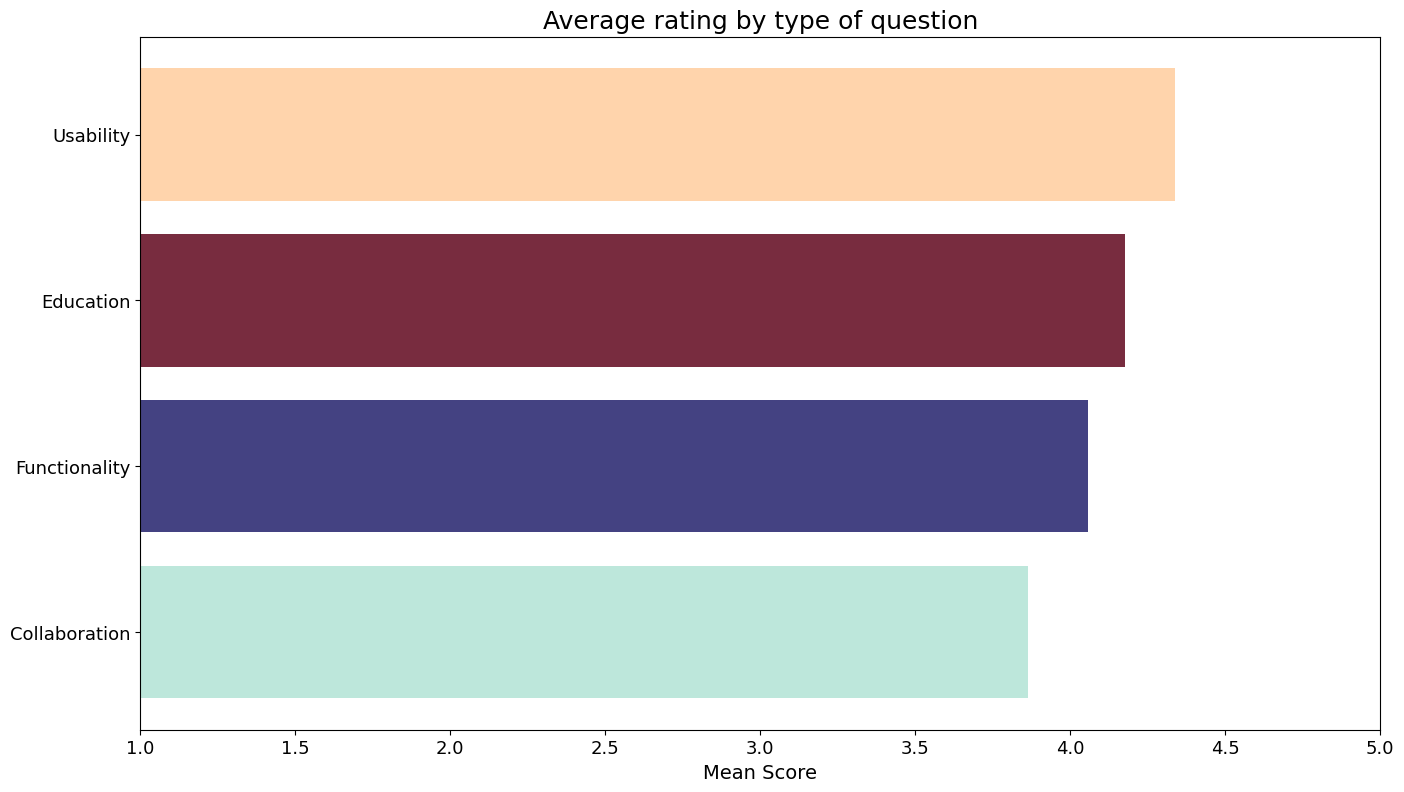

In [13]:
colors = [cmap(i) for i in np.linspace(0, 1, len(students_q_type))]

fig = plt.figure()
plt.barh(students_q_type['Type'], students_q_type['mean'], color=colors, align='center')
plt.title('Average rating by type of question')
plt.xlabel('Mean Score')
plt.xlim(1,5)
plt.show()

There is not much variability in the answers by type, but nonetheless the highest rated ones are the **Usability** ones, while the lowest score is for the **Collaboration** ones. In the study in the *Salesianos* school, **Collaboration** questions achieved the highest score!

## xAPI statements analysis

Let's analyze now the xAPI statements collected automatically through the application.

In [14]:
zubiri_xapi = pd.read_csv('statements_xubiri_clean.csv', index_col=0).reset_index(drop=True)
zubiri_xapi.head()

,timestamp,stored,actor,verb,object,result
0,2023-05-10 06:08:56.213000+00:00,2023-05-10T06:08:56.213Z,holshola,Swiped,Right,"{""score"":{""raw"":0}}"
1,2023-05-10 06:09:04.204000+00:00,2023-05-10T06:09:04.204Z,holshola,Logged In,Xabier Zubiri Manteo,"{""score"":{""raw"":0}}"
2,2023-05-10 06:14:17.343000+00:00,2023-05-10T06:14:17.343Z,Android201,Logged In,Xabier Zubiri Manteo,"{""score"":{""raw"":0}}"
3,2023-05-10 06:15:04.466000+00:00,2023-05-10T06:15:04.466Z,Teacher,Logged In,Xabier_Zubiri Manteo,NaN
4,2023-05-10 06:16:00.053000+00:00,2023-05-10T06:16:00.053Z,Teacher,Logged In,Xabier_Zubiri Manteo,NaN


#### 1) Student interactions with the app (and how they correlate with the survey answers)

We will start the app data analysis by looking at the number of total interactions that the students had. First, we have to clean the dataset because the actor column includes some wrong names (as one user made an error when logging to the app).

In [15]:
zubiri_xapi["actor"].unique()

array(['holshola', 'Android201', 'Teacher', 'Android203', 'Android202',
       'Android204', 'Tablet202', 'PC028', 'iPhone201', 'IPhone202',
       'Tablet201', 'iPad202', 'PC025', 'PC029', 'PC024', 'mario',
       'PC023', 'PC026', 'PC022', 'android203', 'PC021', 'Iphone202',
       'PC011'], dtype=object)

Let's remove the actors who are not supposed to be there (representing users that used the wrong username, and later logged out and logged in with the correct name). Let's also rename the actors in the format used when filling the questionnaires.

In [16]:
a = ["holshola", "mario"]
zubiri_xapi = zubiri_xapi[~zubiri_xapi['actor'].isin(a)]
zubiri_xapi = zubiri_xapi.replace({"actor": {"Iphone202": "iPhone202",
                                   "android203": "Android203"}})                    
print(f"Number of users, including teacher: {len(zubiri_xapi['actor'].unique())}")
zubiri_xapi["actor"].unique()           

Number of users, including teacher: 20


array(['Android201', 'Teacher', 'Android203', 'Android202', 'Android204',
       'Tablet202', 'PC028', 'iPhone201', 'IPhone202', 'Tablet201',
       'iPad202', 'PC025', 'PC029', 'PC024', 'PC023', 'PC026', 'PC022',
       'PC021', 'iPhone202', 'PC011'], dtype=object)

We won't count "Logged In" or "Logged Out" as interactions, since they do not contribute to the real use of the app:

In [17]:
actions = ["Logged In", "Logged Out"]
students_app_interactions = zubiri_xapi[~zubiri_xapi['verb'].isin(actions)]
students_app_interactions["verb"].unique()

array(['Swiped', 'Placed', 'Started', 'Asked', 'Set Turn', 'Accepted',
       'Suggested', 'Sent', 'Assigned', 'Checked', 'Canceled', 'Ended',
       'Ran Out'], dtype=object)

In [18]:
interactions = students_app_interactions.groupby(['actor'])["verb"].agg(['count']).sort_values("count")
interactions

,count
actor,
IPhone202,9
PC021,15
PC023,15
PC022,29
PC026,32
PC025,35
PC024,36
PC011,37
PC028,43


As for the trial in the previous school, the previous aggregation clearly shows that the PC students have significantly less interactions than the mobile students. This is due to their only interaction being the suggestions, as can be shown in the next line:

In [19]:
students_app_interactions[(students_app_interactions["actor"]=="PC011")]["verb"].unique()

array(['Suggested'], dtype=object)

Let's plot the number of interactions:

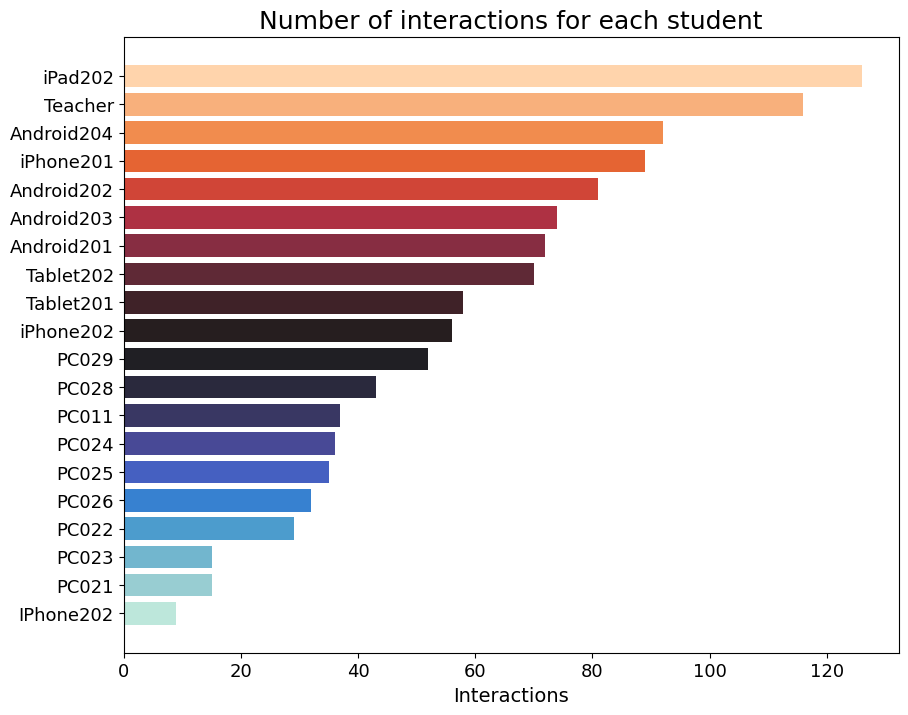

In [20]:
colors = [cmap(i) for i in np.linspace(0, 1, len(interactions))]

fig = plt.figure(figsize=(10, 8))
plt.barh(interactions.index, interactions['count'], color=colors, align='center')
plt.title('Number of interactions for each student')
plt.xlabel('Interactions')
plt.show()

The interesting aspect to analyse is whether there is any correlation between the number of interactions for each student and the answers they have given to the survey questions. Similar to what we did in the previos analysis, we will follow two statistical approaches:

1) **Correlation analysis**: We will investigate whether there is a correlation between the number of interactions and the average scores given to the questions by the students. To do this, we will calculate the Pearson correlation coefficient and the corresponding p-value. The Pearson correlation coefficient measures the strength and direction of the linear relationship between the interactions and the scores, and the p-value indicates whether this relationship is statistically significant. If the p-value is below a significance level of 0.05, we can conclude that there is evidence of a significant correlation between the interactions and the survey scores.

2) **Hypothesis testing**: We will also perform a hypothesis test to investigate whether the survey answers given by students who had a high number of interactions are significantly different from the survey answers given by students who had a low number of interactions. We will perform a two-sample t-test assuming equal variances, which returns the t-statistic and the corresponding p-value. As in the previous analysis, if the p-value is below 0.05, we can conclude that there is evidence of a significant difference in survey answers between the two groups.

In the test performed at the Deusto school, the number of students and datapoints is even less than in the previous school, so we do not expect to find statistically significant results... but let's check it out

In [21]:
interactions = interactions.reset_index()
int_df = student_list.merge(interactions, left_on="Student", right_on="actor").drop("actor", axis=1)
int_pc_df = pc_list.merge(interactions, left_on="Student", right_on="actor").drop("actor", axis=1)
int_mobile_df = mobile_list.merge(interactions, left_on="Student", right_on="actor").drop("actor", axis=1)

In [22]:
from scipy.stats import ttest_ind, pearsonr

high_interactions = int_df["mean"][int_df["count"] >= int_df["count"].mean()]
low_interactions = int_df["mean"][int_df["count"] < int_df["count"].mean()]

t_stat, p_value = ttest_ind(high_interactions, low_interactions)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_df["count"], int_df["mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: -0.9455768330474121
P-value: 0.3593484386320577

Pearson correlation coefficient: -0.13298297022996852
P-value: 0.6108865736316487


In [23]:
high_interactions = int_mobile_df["mean"][int_mobile_df["count"] >= int_mobile_df["count"].mean()]
low_interactions = int_mobile_df["mean"][int_mobile_df["count"] < int_mobile_df["count"].mean()]

t_stat, p_value = ttest_ind(high_interactions, low_interactions)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_mobile_df["count"], int_mobile_df["mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.07914886410040213
P-value: 0.9391293507906454

Pearson correlation coefficient: 0.30646390306798665
P-value: 0.42249874472130416


In [24]:
high_interactions = int_pc_df["mean"][int_pc_df["count"] >= int_pc_df["count"].mean()]
low_interactions = int_pc_df["mean"][int_pc_df["count"] < int_pc_df["count"].mean()]

t_stat, p_value = ttest_ind(high_interactions, low_interactions)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_pc_df["count"], int_pc_df["mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: -0.7872958216222169
P-value: 0.46106733065779815

Pearson correlation coefficient: -0.5354924853992516
P-value: 0.17138170885710405


The p-values are below the significance level of 0.05 we have set, but the correlation coefficients are quite different from zero... Only for PC users there seem to be a significant (negative) correlation, albeit with a p-value quite above the significance threshold. Let's show the linear relationship on a scatterplot


(2.0, 5.0)

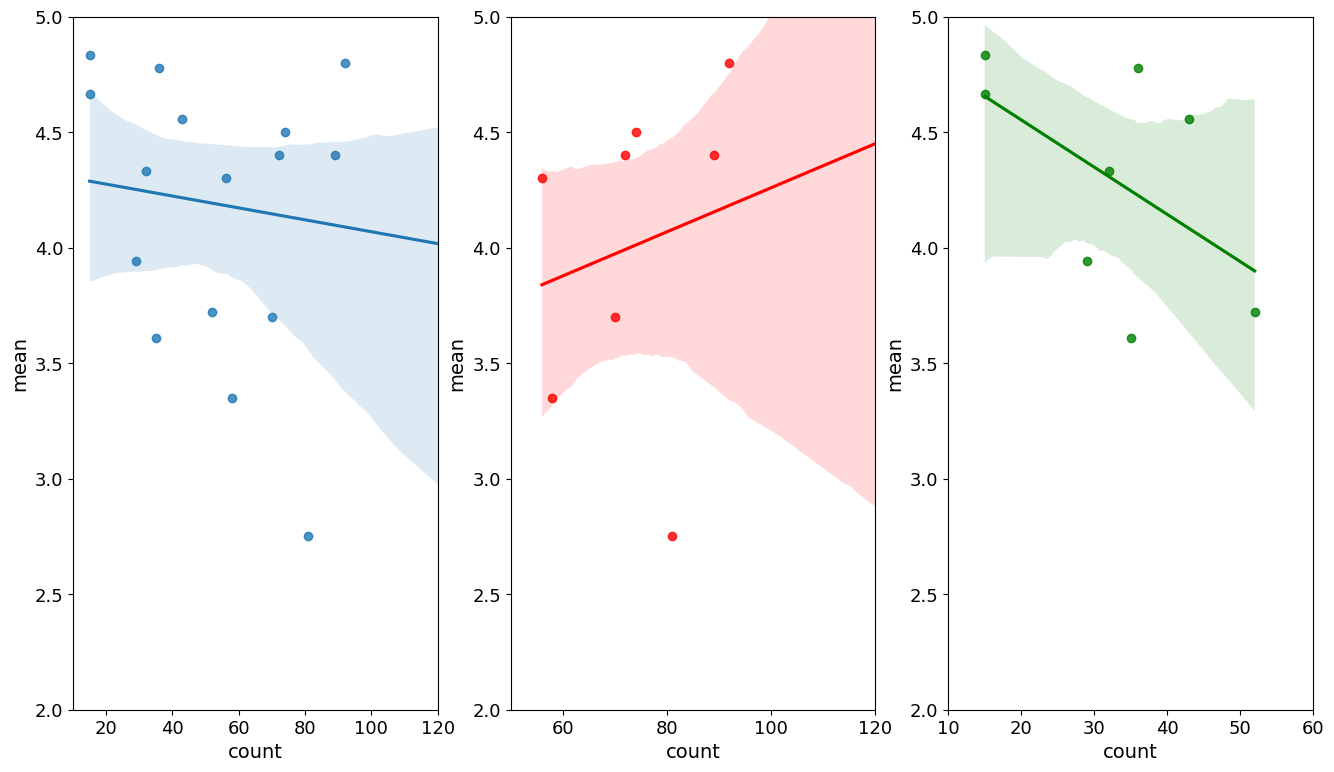

In [25]:
f, axes = plt.subplots(1, 3)

sns.regplot(x="count", y="mean", data=int_df, ax=axes[0]);
sns.regplot(x="count", y="mean", data=int_mobile_df, ax=axes[1], color='red', line_kws={'color': 'red'});
sns.regplot(x="count", y="mean", data=int_pc_df, ax=axes[2], color='green', line_kws={'color': 'green'});
axes[0].set_xlim([10, 120])
axes[0].set_ylim([2, 5])
axes[1].set_xlim([50, 120])
axes[1].set_ylim([2, 5])
axes[2].set_xlim([10, 60])
axes[2].set_ylim([2, 5])


#### 2) Mobile students grades

When the mobile students submit an answer, the teacher assigns them a grade, which can be found in the "Assigned" action. We will study whether there is correlation between the grade the students have obtained and their answers to the survey.

In [26]:
df = zubiri_xapi[(zubiri_xapi["actor"]=="Teacher") & (zubiri_xapi["verb"]=="Assigned")]
df.head()

,timestamp,stored,actor,verb,object,result
233,2023-05-10 06:25:32.607000+00:00,2023-05-10T06:25:32.607Z,Teacher,Assigned,7.72;Android204,NaN
257,2023-05-10 06:25:59.125000+00:00,2023-05-10T06:25:59.125Z,Teacher,Assigned,8.72;Tablet201,NaN
295,2023-05-10 06:26:27.439000+00:00,2023-05-10T06:26:27.439Z,Teacher,Assigned,9.15;iPhone201,NaN
325,2023-05-10 06:27:25.459000+00:00,2023-05-10T06:27:25.459Z,Teacher,Assigned,5.8;iPad202,NaN
354,2023-05-10 06:28:01.630000+00:00,2023-05-10T06:28:01.630Z,Teacher,Assigned,8.2;Android201,NaN


In the previous dataframe we can see where the grades are stored. We need to extract them and clean the user names.

In [27]:
grades = pd.DataFrame(df["object"].str.split(";", expand=True))
grades.columns = ["score", "student"]
grades["student"].unique()

array(['Android204', 'Tablet201', 'iPhone201', 'iPad202', 'Android201',
       'Android202', 'Iphone202', 'Tablet202', 'Android203'], dtype=object)

In [28]:
grades = grades.replace({"student": {"Iphone202": "iPhone202"}}) 
grades

,score,student
233,7.72,Android204
257,8.72,Tablet201
295,9.15,iPhone201
325,5.8,iPad202
354,8.2,Android201
402,2.63,Android202
445,8.63,iPhone202
465,4.8,Tablet202
505,3.8,Android203
540,9.15,Android204


In [29]:
grades["score"] = grades["score"].astype("float")
grades = grades.groupby('student', as_index=False)['score'].mean().sort_values("score")
grades

,student,score
1,Android202,4.476667
2,Android203,5.583333
8,iPhone202,5.910000
0,Android201,6.600000
4,Tablet201,6.735000
3,Android204,6.967500
5,Tablet202,7.300000
6,iPad202,7.383333
7,iPhone201,9.150000


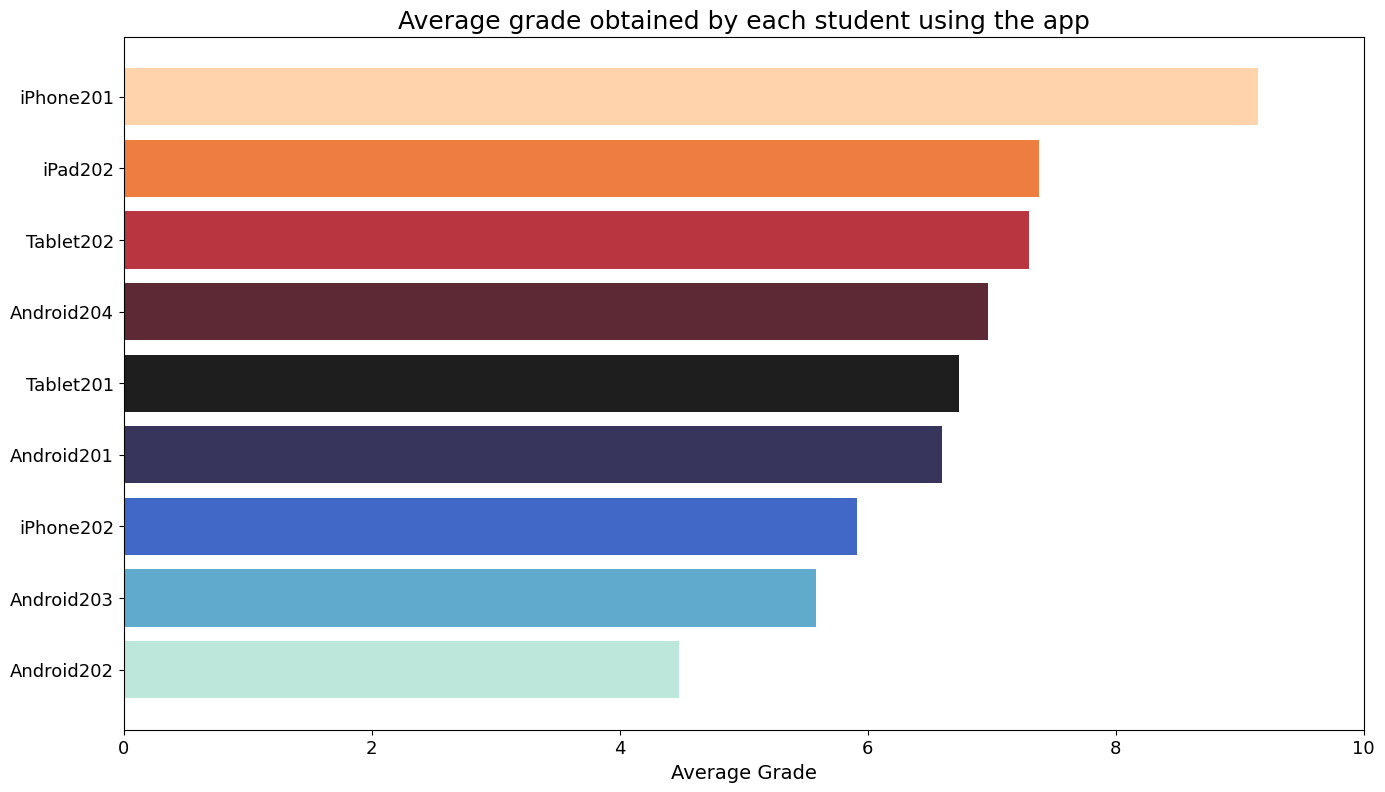

In [30]:
colors = [cmap(i) for i in np.linspace(0, 1, len(grades))]

fig = plt.figure()
plt.barh(grades["student"], grades['score'], color=colors, align='center')
plt.title('Average grade obtained by each student using the app')
plt.xlabel('Average Grade')
plt.xlim(0, 10)
plt.show()

We will now perform the same analysis as in the previous section with the survey answers to see if there is correlation between the survey answers and the grades obtained.

In [31]:
grade_df = student_list.merge(grades, left_on="Student", right_on="student").drop("student", axis=1)
grade_df

,Student,mean,score
0,Android202,2.75,4.476667
1,Tablet201,3.35,6.735000
2,Tablet202,3.70,7.300000
3,iPhone202,4.30,5.910000
4,iPad202,4.40,7.383333
5,Android201,4.40,6.600000
6,iPhone201,4.40,9.150000
7,Android203,4.50,5.583333
8,Android204,4.80,6.967500


In [32]:
high_grade = grade_df["mean"][grade_df["score"] >= grade_df["score"].mean()]
low_grade = grade_df["mean"][grade_df["score"] < grade_df["score"].mean()]

t_stat, p_value = ttest_ind(high_grade, low_grade)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(grade_df["score"], grade_df["mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.3025909589734654
P-value: 0.7709952744373296

Pearson correlation coefficient: 0.4651601358519154
P-value: 0.20705094411463795


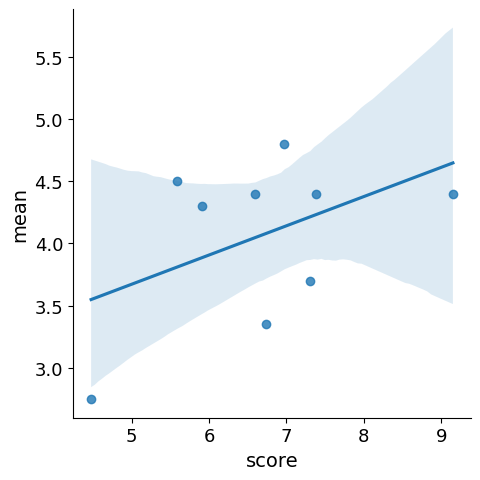

In [33]:
sns.lmplot(x="score", y="mean", data=grade_df);

There seem to be a correlation between the variables, but without a p-value below the significance threshold.
Another interesting focus point would be to study the correlation between the number of interactions by the mobile-only students and the grades they've obtained:

In [34]:
int_grade_df = interactions.merge(grades, left_on="actor", right_on="student").drop("student", axis=1)
int_grade_df

,actor,count,score
0,iPhone202,56,5.910000
1,Tablet201,58,6.735000
2,Tablet202,70,7.300000
3,Android201,72,6.600000
4,Android203,74,5.583333
5,Android202,81,4.476667
6,iPhone201,89,9.150000
7,Android204,92,6.967500
8,iPad202,126,7.383333


In [35]:
high_grade = int_grade_df["count"][int_grade_df["score"] >= int_grade_df["score"].mean()]
low_grade = int_grade_df["count"][int_grade_df["score"] < int_grade_df["score"].mean()]

t_stat, p_value = ttest_ind(high_grade, low_grade)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_grade_df["score"], int_grade_df["count"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 1.1672677225514376
P-value: 0.2813209247791443

Pearson correlation coefficient: 0.33339460841796315
P-value: 0.3806201977753009


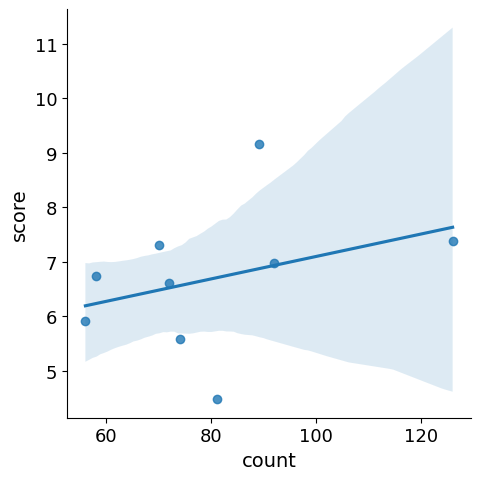

In [36]:
sns.lmplot(x="count", y="score", data=int_grade_df);

And in this case, again we cannot find any meaningful correlations in the data.

#### 3) Accepted suggestions

Let's have a look if the suggestions sent by the users were accepted from the students when answering the questions:

In [37]:
accepted_suggestions = students_app_interactions[students_app_interactions["verb"]=="Accepted"]

In [38]:
accepted = accepted_suggestions.groupby(['actor'])["verb"].agg(['count']).sort_values("count").reset_index()
accepted

,actor,count
0,Android201,3
1,Android202,3
2,Android203,3
3,Tablet201,3
4,Tablet202,3
5,iPad202,3
6,iPhone201,3
7,iPhone202,3
8,Android204,4


We will perform the same analysis as before, first with the survey answers:

In [39]:
accepted_df = student_list.merge(accepted, left_on="Student", right_on="actor").drop("actor", axis=1)
accepted_df

,Student,mean,count
0,Android202,2.75,3
1,Tablet201,3.35,3
2,Tablet202,3.70,3
3,iPhone202,4.30,3
4,iPad202,4.40,3
5,Android201,4.40,3
6,iPhone201,4.40,3
7,Android203,4.50,3
8,Android204,4.80,4


In [40]:
high_accepted = accepted_df["count"][accepted_df["mean"] >= accepted_df["mean"].mean()]
low_accepted = accepted_df["count"][accepted_df["mean"] < accepted_df["mean"].mean()]

t_stat, p_value = ttest_ind(high_accepted, low_accepted)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(accepted_df["mean"], accepted_df["count"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.6831300510639727
P-value: 0.5164895523012265

Pearson correlation coefficient: 0.4160582109597285
P-value: 0.2653561574210465


/var/folders/mb/gp2pv4vs4tb05cb9df4whm7r0000gn/T/ipykernel_1766/4251687849.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(high_accepted, low_accepted)


This test shows us that there is no clear correlation in this case. Let's check with the grades:

In [41]:
accepted_grades_df = grades.merge(accepted, left_on="student", right_on="actor").drop("actor", axis=1)
accepted_grades_df

,student,score,count
0,Android202,4.476667,3
1,Android203,5.583333,3
2,iPhone202,5.910000,3
3,Android201,6.600000,3
4,Tablet201,6.735000,3
5,Android204,6.967500,4
6,Tablet202,7.300000,3
7,iPad202,7.383333,3
8,iPhone201,9.150000,3


In [42]:
high_accepted = accepted_df["count"][accepted_df["mean"] >= accepted_df["mean"].mean()]
low_accepted = accepted_df["count"][accepted_df["mean"] < accepted_df["mean"].mean()]

t_stat, p_value = ttest_ind(high_accepted, low_accepted)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(accepted_df["mean"], accepted_df["count"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.6831300510639727
P-value: 0.5164895523012265

Pearson correlation coefficient: 0.4160582109597285
P-value: 0.2653561574210465


/var/folders/mb/gp2pv4vs4tb05cb9df4whm7r0000gn/T/ipykernel_1766/4251687849.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(high_accepted, low_accepted)


There is no correlation in this case either.

## AI-based analysis

In this case we will skip the PCA analysis as well as the clustering of the data points, as we plan to do that only with the aggregated data, that is the ones which combine the data from students in the 3 schools.